In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')# Load saved data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-theta.npz", allow_pickle=True)
all_theta = data["all_theta"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-gamma.npz", allow_pickle=True)
all_gamma = data["all_gamma"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-z.npz", allow_pickle=True)
all_z = data["all_z"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-noise.npz", allow_pickle=True)
all_noise = data["all_noise"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-received-signal.npz", allow_pickle=True)
all_received_signal = data["all_received_signal"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-general.npz", allow_pickle=True)
snr_db_array = data["snr_db_array"]
pilot_length_array = data["pilot_length_array"]
M = data["M"]

Mounted at /content/drive


Results CA-SBL Alpha = 1.0 Beta = 2.0

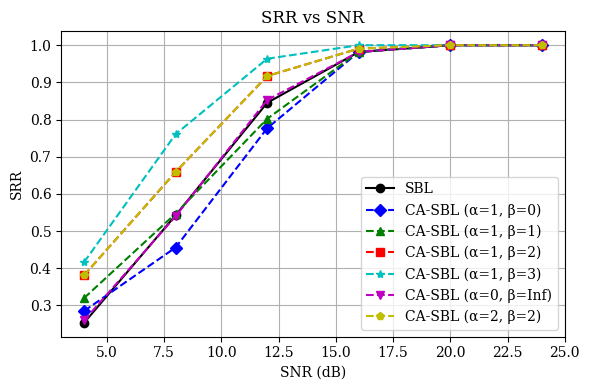

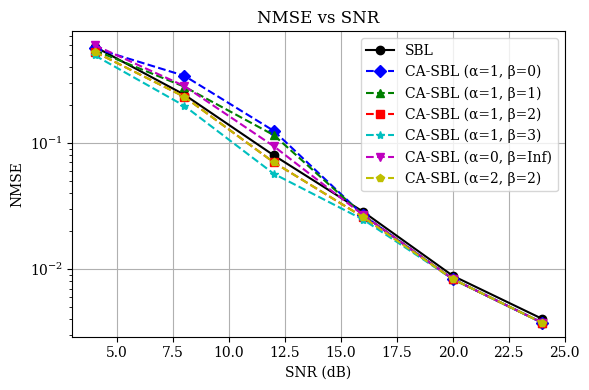

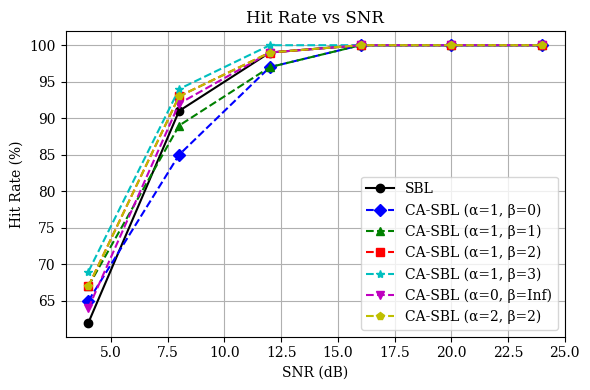

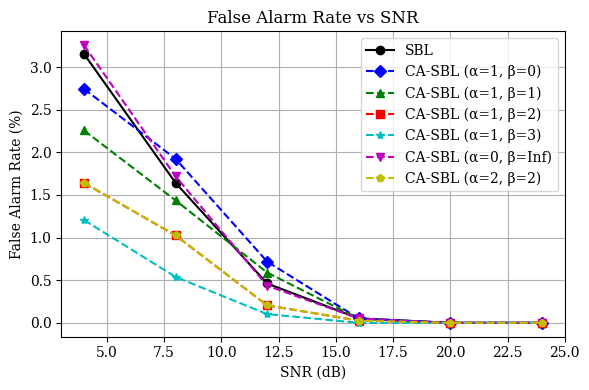

In [28]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(snr_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False):
    """Plots a given metric for multiple datasets."""
    plt.figure(figsize=(6, 4))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        plt.plot(snr_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label)

    plt.xlabel('SNR (dB)')
    plt.ylabel(y_label)
    plt.title(title)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-snr-db-all-pilot-length-20.npz",
    "CA-SBL (α=1, β=0)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-0-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL (α=1, β=1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-1-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL (α=1, β=2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-2-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL (α=1, β=3)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-3-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL (α=0, β=Inf)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-0-0-beta-3-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL (α=2, β=2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-2-0-snr-db-all-pilot-length-20.npz",
}

markers = ['o', 'D', '^', 's', '*','v', 'p']
colors = ['k', 'b', 'g', 'r', 'c', 'm', 'y']
linestyles= ['-', '--', '--', '--', '--', '--','--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define SNR values
snr_values = snr_db_array

# Plot different metrics
plot_metric(snr_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs SNR', 'SRR', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs SNR', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(snr_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs SNR', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs SNR', 'False Alarm Rate (%)', markers, colors, linestyles)


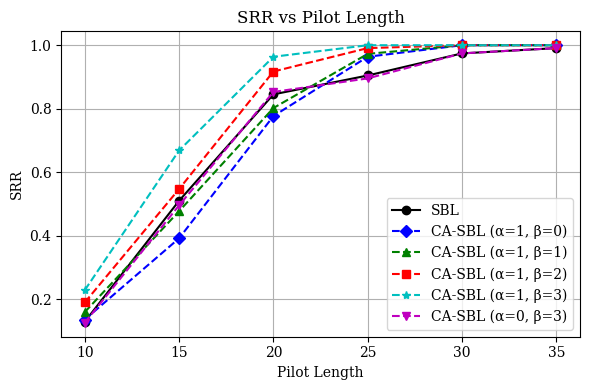

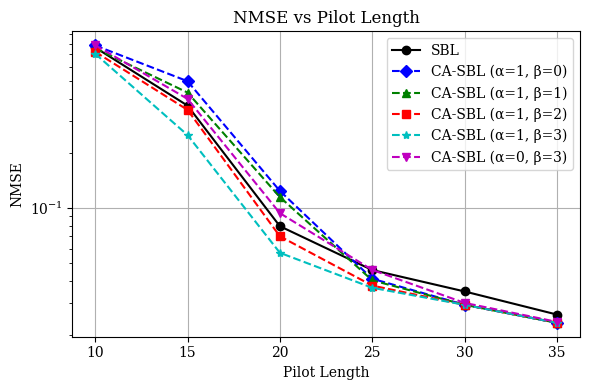

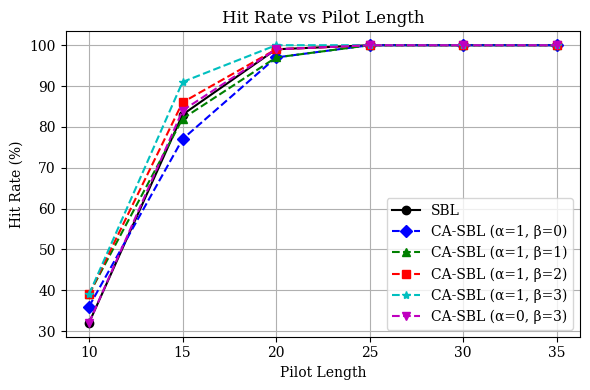

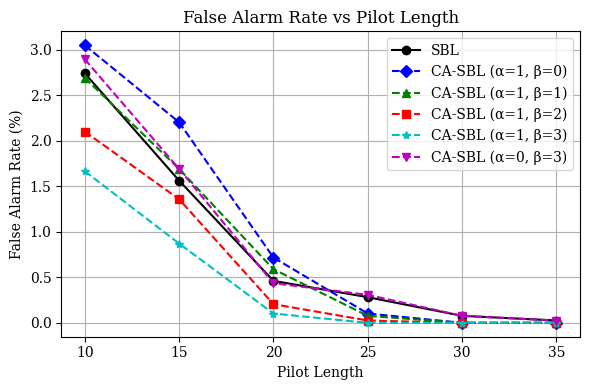

In [27]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(pilot_length_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False):
    """Plots a given metric for multiple datasets."""
    plt.figure(figsize=(6, 4))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        plt.plot(pilot_length_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label)

    plt.xlabel('Pilot Length')
    plt.ylabel(y_label)
    plt.title(title)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-pilot-length-all-snr-db-12.npz",
    "CA-SBL (α=1, β=0)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-0-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL (α=1, β=1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-1-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL (α=1, β=2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-2-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL (α=1, β=3)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-1-0-beta-3-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL (α=0, β=Inf)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-0-0-beta-3-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL (α=2, β=2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-scc-alpha-2-0-beta-2-0-pilot-length-all-snr-db-12.npz",
}

markers = ['o', 'D', '^', 's', '*','v', 'p']
colors = ['k', 'b', 'g', 'r', 'c', 'm', 'y']
linestyles= ['-', '--', '--', '--', '--', '--','--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define pilot length values
pilot_length_values = pilot_length_array

# Plot different metrics
plot_metric(pilot_length_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs Pilot Length', 'SRR', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs Pilot Length', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(pilot_length_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs Pilot Length', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs Pilot Length', 'False Alarm Rate (%)', markers, colors, linestyles)
